Importing the Dependencies

In [16]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [17]:
# Loading the data from csv file to pandas dataframe
car_data = pd.read_csv('car data.csv')

In [18]:
# Checking the dataframe
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
# Checking the no of Rows and Columns
car_data.shape

(301, 9)

In [20]:
# Info on the Data
car_data.info()
car_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [21]:
# Statistical Data
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [22]:
# Checking the Distribution of different catagorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [23]:
# Encoding "Fuel_Type" Column
car_data["Fuel_Type"] = car_data["Fuel_Type"].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

# Encoding "Seller_Type" Column
car_data["Seller_Type"] = car_data["Seller_Type"].map({'Dealer': 0, 'Individual': 1})

# Encoding "Transmission" Column
car_data["Transmission"] = car_data["Transmission"].map({'Manual': 0, 'Automatic': 1})


In [24]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Training Data and Test Data

In [27]:
# Divide Predicting Part from the Data
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [28]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
# Creating Tarining and Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=69)

Model Training

In [30]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [31]:
# Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [41]:
# Model Evaluation
# Linear Regression Model Evaluation
Test_data_lr_Prediction = lr_model.predict(X_test)
error_score_lr = metrics.r2_score(Y_test, Test_data_lr_Prediction)
print("R squared Error : ", error_score_lr)
mae_lr = metrics.mean_absolute_error(Y_test, Test_data_lr_Prediction)
mse_lr = metrics.mean_squared_error(Y_test, Test_data_lr_Prediction)
print("Mean Absolute Error (MAE) Linear Regression:", mae_lr)
print("Mean Squared Error (MSE) Linear Regression:", mse_lr)

# Lasso Regression Model Evaluation
Test_data_lasso_Prediction = lasso_model.predict(X_test)
error_score_lasso = metrics.r2_score(Y_test, Test_data_lasso_Prediction)
print("R squared Error : ", error_score_lasso)
mae_lasso = metrics.mean_absolute_error(Y_test, Test_data_lasso_Prediction)
mse_lasso = metrics.mean_squared_error(Y_test, Test_data_lasso_Prediction)
print("Mean Absolute Error (MAE) Lasso Regression:", mae_lasso)
print("Mean Squared Error (MSE) Lasso Regression:", mse_lasso)


R squared Error :  0.9068200138988795
Mean Absolute Error (MAE) Linear Regression: 0.7713964485538608
Mean Squared Error (MSE) Linear Regression: 1.04289891112003
R squared Error :  0.8475521475373855
Mean Absolute Error (MAE) Lasso Regression: 1.0330910327015352
Mean Squared Error (MSE) Lasso Regression: 1.7062430033345506


Plotting and Comparing

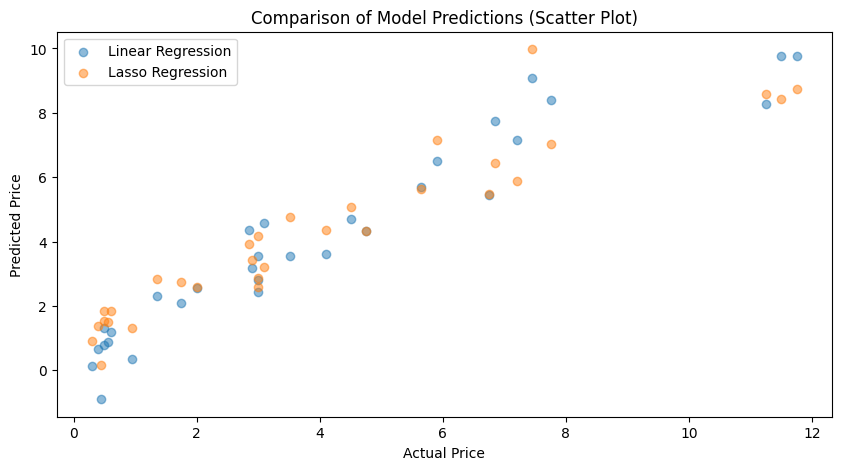

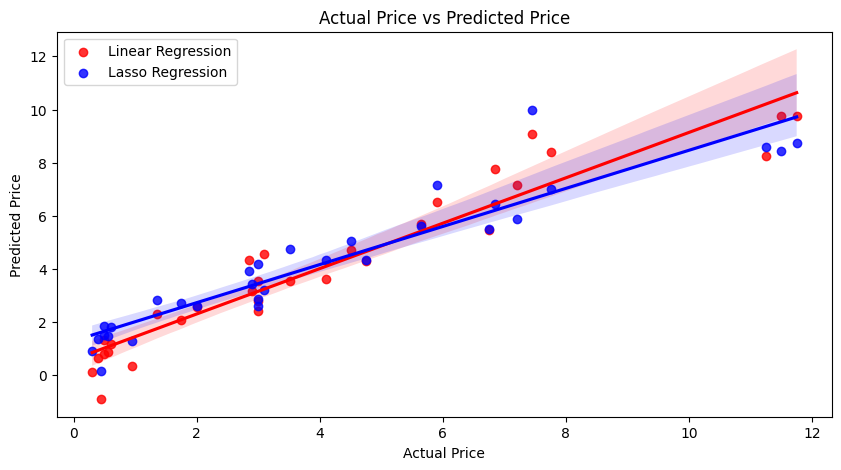

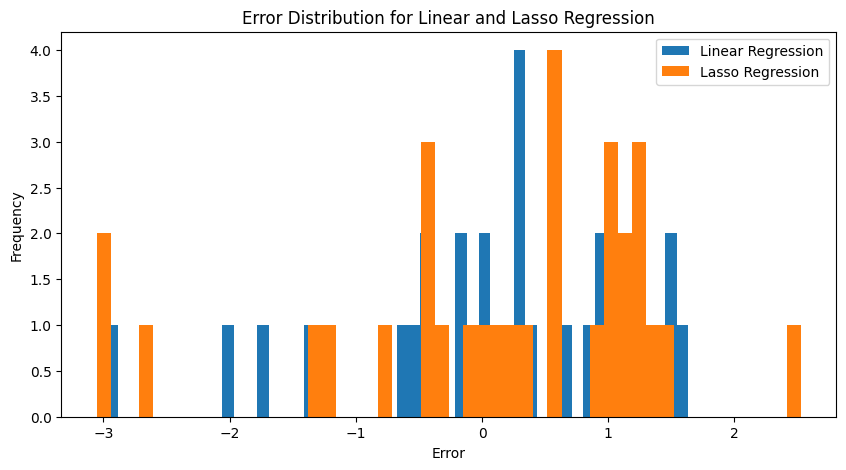

In [42]:

plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Test_data_lr_Prediction, label='Linear Regression', alpha=0.5)
plt.scatter(Y_test, Test_data_lasso_Prediction, label='Lasso Regression', alpha=0.5)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Model Predictions (Scatter Plot)')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.regplot(x=Y_test, y=Test_data_lr_Prediction, color="red", label='Linear Regression')
sns.regplot(x=Y_test, y=Test_data_lasso_Prediction, color="blue", label='Lasso Regression')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.hist(Test_data_lr_Prediction-Y_test, bins=50, label="Linear Regression")
plt.hist(Test_data_lasso_Prediction-Y_test, bins=50, label="Lasso Regression")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution for Linear and Lasso Regression")
plt.legend()
plt.show()
